## Plotting Titanic Dataset

All colors generated using [Paletton](http://paletton.com/#uid=33k130kllllcLxNh2qYpDfItVa4)

In [170]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

import pandas as pd

In [171]:
ALPHA = 0.55 # Global alpha, because soft colors look great on plots

plts = [] # hold on to those plts so that we can convert them using plotly

titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Create a bar chart for number of passengers survived by class

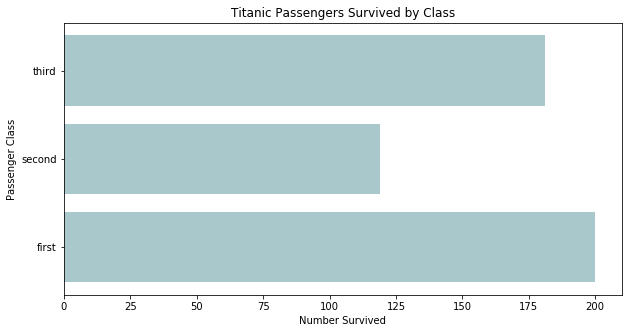

In [172]:
# compute the number of passengers survived by class, etc
g = titanic.groupby(['pclass', 'survived'])
s = (g['survived'].sum())
s1, s2, s3 = s[1][1], s[2][1], s[3][1]

# make a bar chart
N = 3 # how many bars do we have
ind = np.arange(N) # spacing of the x labels
y = [s1,s2,s3]
tick_label = ['first','second','third']
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(ind, width=y, color='#629CA1', tick_label=tick_label, alpha=ALPHA)
ax.set_ylabel('Passenger Class')
ax.set_xlabel('Number Survived')
ax.set_title('Titanic Passengers Survived by Class')

plts.append(fig)

#### 2. Create a vertical bar chart for passengers survived by class and gender

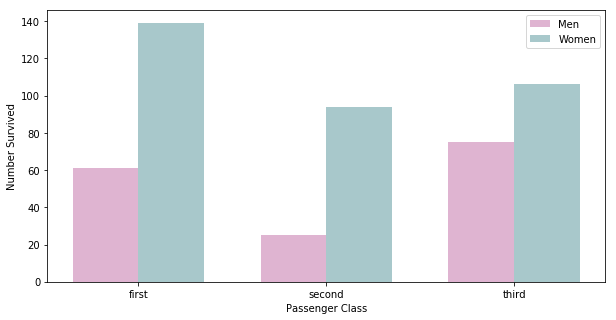

In [173]:
g = titanic.groupby(['pclass','sex','survived'])
c = g['survived'].sum()
men   = [c[i]['male'][1] for i in range(1,4)]
women = [c[i]['female'][1] for i in range(1,4)]

# create plot
N = 3 # for the 3 classes
width = 0.35
ind = np.arange(N)
tick_label = ['first','second','third']

fix, ax = plt.subplots(figsize=(10,5))

r1 = ax.bar(ind, men, width=width, color='#C677AC', alpha=ALPHA)
r2 = ax.bar(ind+width, women, width=width, color='#629CA1', alpha=ALPHA)

ax.set_xticks(ind + width/2)
ax.set_xticklabels(tick_label)
ax.set_ylabel('Number Survived')
ax.set_xlabel('Passenger Class')
ax.legend((r1[0],r2[0]), ('Men','Women'))

plts.append(fig)

#### 3. Create a stacked chart survived vs dead for different classes and gender

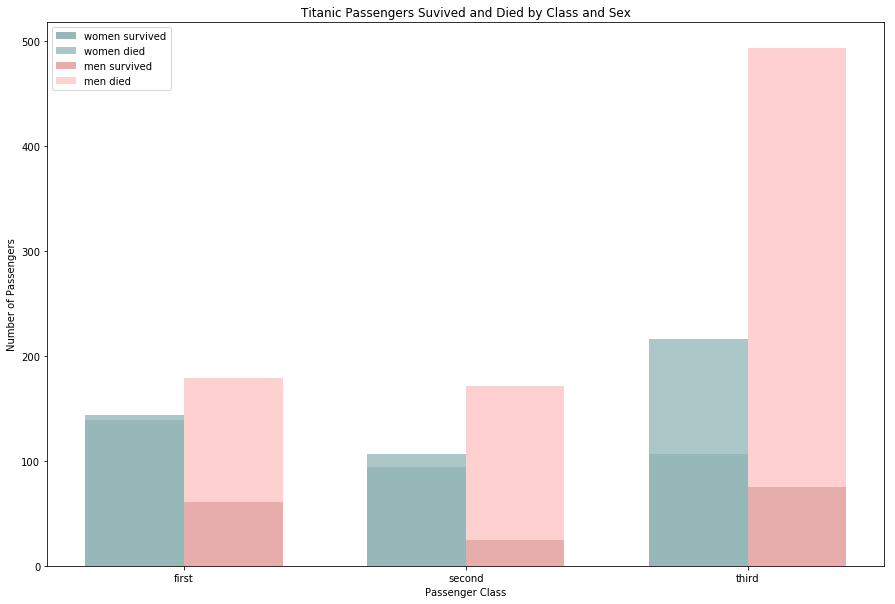

In [174]:
g = titanic.groupby(['pclass','sex','survived'])
# add the two resulting series to get a single series which contains counts of survived and died
a = g['survived'].sum() + g['survived'].apply(lambda x: x[x==0].count())

men_s   = [a[i]['male'][1] for i in range(1,4)]
men_d   = [a[i]['male'][0] for i in range(1,4)]
women_s = [a[i]['female'][1] for i in range(1,4)]
women_d = [a[i]['female'][0] for i in range(1,4)]

data = [men_s,men_d,women_s,women_d]
data

N = 3 # number of classes
ind = np.arange(N)
tick_label = ['first','second','third']
width = 0.35

fig, ax = plt.subplots(figsize=(15,10))

# going to need 4 colors;
# female survived: #407F7F
# female died:     #669999
# male survived:   #D46A6A
# male died:       #FFAAAA
r1 = ax.bar(ind, women_s, width=width, 
            color='#407F7F', alpha=ALPHA)
r2 = ax.bar(ind, women_d, width=width, 
            color='#669999', bottom=women_s, alpha=ALPHA)
r3 = ax.bar(ind+width, men_s, width=width, 
            color='#D46A6A', alpha=ALPHA)
r4 = ax.bar(ind+width, men_d, width=width, 
            color='#FFAAAA', bottom=men_s, alpha=ALPHA)

ax.set_xticks(ind + width/2)
ax.set_xticklabels(tick_label)
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Passengers')
ax.set_title('Titanic Passengers Suvived and Died by Class and Sex')
ax.legend((r1[0],r2[0],r3[0],r4[0]),
          ('women survived','women died','men survived','men died'))

plts.append(fig)

#### 4. Plot histogram of fares paid for passengers bins = 30

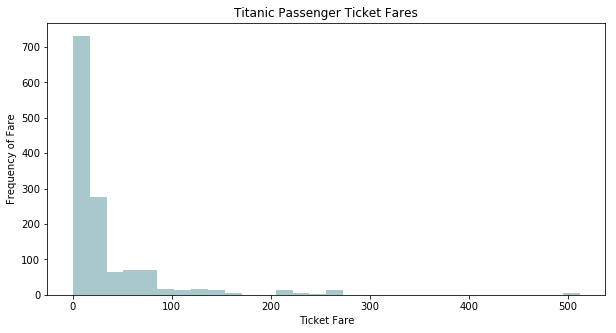

In [175]:
fares = titanic['fare'].dropna()
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Ticket Fare')
ax.set_ylabel('Frequency of Fare')
ax.set_title('Titanic Passenger Ticket Fares')
_, _, _ = ax.hist(fares, 30, color='#629CA1', alpha=ALPHA)

plts.append(fig)

#### 5.Create a KDE vs bar plot of the fare

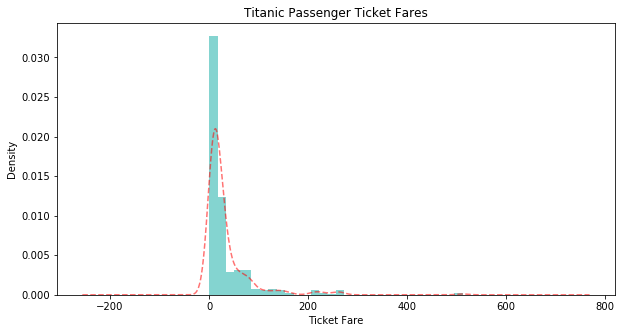

In [176]:
# vs a histogram?
fares = titanic['fare'].dropna()
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Ticket Fare')
ax.set_ylabel('Frequency of Fare')
ax.set_title('Titanic Passenger Ticket Fares')
#n, b, p = ax.hist(fares, 30, color='#629CA1', normed=True)

# I tried to do it 'manually' where I calculated alpha and beta and generated a gamma pdf
# which closely fit, but I couldn't get it to plot properly over the histogram...

fares.hist(bins=30, normed=True, color='lightseagreen', alpha=ALPHA)
fares.plot(kind='kde', style='r--', alpha=ALPHA)

plts.append(fig)

#### 6. Create a box plot of the fares by passenger class

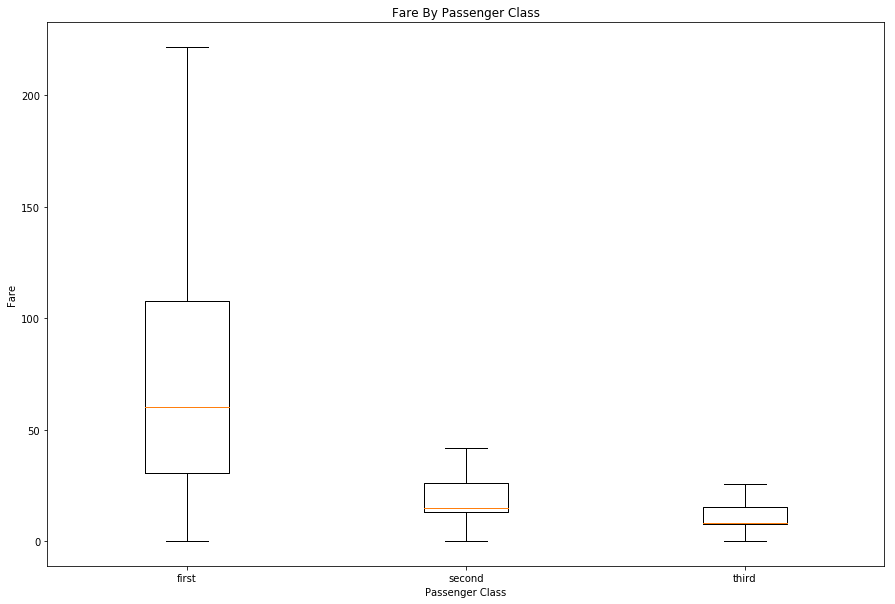

In [177]:
N = 3 # Number of classes
ind = np.arange(N)

fig, ax = plt.subplots(figsize=(15,10))

# class: [1st], [2nd], [3rd]
data = [titanic[titanic['pclass'] == i]['fare'].dropna() for i in range(1,4)]

p1 = ax.boxplot(data, 0, '') # don't show the outliers
ax.set_xticklabels(['first','second','third'])
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Fare')
ax.set_title('Fare By Passenger Class')

plts.append(fig)

#### 7. Create a box plot of the age by passenger class

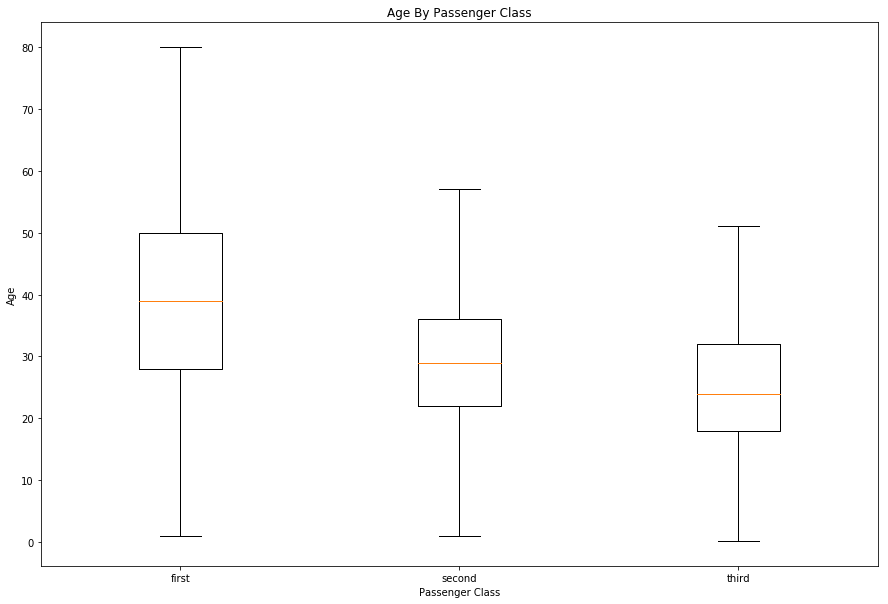

In [178]:
N = 3 # Number of classes
ind = np.arange(N)

fig, ax = plt.subplots(figsize=(15,10))

# class: [1st], [2nd], [3rd]
data = [titanic[titanic['pclass'] == i]['age'].dropna() for i in range(1,4)]

p1 = ax.boxplot(data, 0, '') # don't show the outliers
ax.set_xticklabels(['first','second','third'])
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Age')
ax.set_title('Age By Passenger Class')

plts.append(fig)

#### Try Plotly to do all of the above

In [179]:
len(plts)

7

In [180]:
py.sign_in('cssabol', 'REDACTED')

In [181]:
py.iplot(tls.mpl_to_plotly(plts[0]))

In [182]:
py.iplot(tls.mpl_to_plotly(plts[1]))

In [183]:
py.iplot(tls.mpl_to_plotly(plts[2]))

C:\Users\datasoup\Anaconda3\lib\site-packages\plotly\matplotlylib\renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [184]:
py.iplot(tls.mpl_to_plotly(plts[3]))

In [185]:
py.iplot(tls.mpl_to_plotly(plts[4]))

In [186]:
py.iplot(tls.mpl_to_plotly(plts[5]))

In [187]:
py.iplot(tls.mpl_to_plotly(plts[6]))